In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Importing required packages and uploading required files

In [3]:
df1=pd.read_csv(r"C:\Users\ADMIN\Videos\capstion_project\final_project\Features_data_set.csv")
df2=pd.read_csv(r"C:\Users\ADMIN\Videos\capstion_project\final_project\sales_data_set.csv")
df3=pd.read_csv(r"C:\Users\ADMIN\Videos\capstion_project\final_project\stores_data_set.csv")

In [4]:
df1.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
df3.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Merge three data set using inner function

In [7]:
first_join= pd.merge(df1, df2, on=['Store',"Date",'IsHoliday'], how='inner')

In [8]:
data=pd.merge(first_join,df3,on=['Store'],how="inner")

In [9]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,B,118221
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,B,118221
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,B,118221


# funal data set

In [11]:
data_1  = data.copy()

# EDA

# Calcuate null percentage

In [12]:
null_percentage=(data_1.isnull().mean()*100).round(2)

In [13]:
pd.DataFrame({
    'columns':null_percentage.index,
    'null_percentage':null_percentage.values
}).sort_values('null_percentage',ascending=False)

,columns,null_percentage
5,MarkDown2,73.61
7,MarkDown4,67.98
6,MarkDown3,67.48
4,MarkDown1,64.26
8,MarkDown5,64.08
0,Store,0.00
1,Date,0.00
2,Temperature,0.00
3,Fuel_Price,0.00
9,CPI,0.00


# Zero percentage 

In [15]:
lis=[]
for i in data_1.columns:
    zero_percentage=((data_1[i]== 0).mean())
    lis.append((i,zero_percentage))
zero_percent=pd.DataFrame(lis,columns=('columns','zero_percentage')).sort_values('zero_percentage',ascending=False)
zero_percent
        

,columns,zero_percentage
11,IsHoliday,0.929642
5,MarkDown2,0.000491
13,Weekly_Sales,0.000173
6,MarkDown3,0.000159
0,Store,0.000000
1,Date,0.000000
2,Temperature,0.000000
3,Fuel_Price,0.000000
4,MarkDown1,0.000000
7,MarkDown4,0.000000


In [14]:
data_1.fillna(0,inplace=True)

In [15]:
data_1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,B,118221
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,B,118221
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,B,118221


# Total number of vector 

In [18]:
data_1.shape[0]

421570

# Total number of column

In [19]:
data_1.shape[1]

16

# Data information 

In [20]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


# Merge all MarkDown

In [37]:
data_1['MarkDown']=data_1['MarkDown1']+data_1['MarkDown2']+data_1['MarkDown3']+data_1['MarkDown4']+data_1['MarkDown5']

In [38]:
data_1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315,NaN
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315,NaN
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315,NaN
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315,NaN
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315,NaN


# Hide the all Markdown

In [93]:
data_2=data_1.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

# Final data

In [94]:
data_2

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,1,24924.50,A,151315,NaN
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,2,50605.27,A,151315,NaN
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,3,13740.12,A,151315,NaN
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,4,39954.04,A,151315,NaN
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,5,32229.38,A,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,192.308899,8.667,False,93,2487.80,B,118221,5247.26
421566,45,26/10/2012,58.85,3.882,192.308899,8.667,False,94,5203.31,B,118221,5247.26
421567,45,26/10/2012,58.85,3.882,192.308899,8.667,False,95,56017.47,B,118221,5247.26
421568,45,26/10/2012,58.85,3.882,192.308899,8.667,False,97,6817.48,B,118221,5247.26


In [95]:
data_2[data_2['MarkDown']==0]

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown


In [96]:
data_2['MarkDown'].replace(0, np.nan, inplace=True)

In [97]:
data_2

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,1,24924.50,A,151315,NaN
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,2,50605.27,A,151315,NaN
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,3,13740.12,A,151315,NaN
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,4,39954.04,A,151315,NaN
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,5,32229.38,A,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,192.308899,8.667,False,93,2487.80,B,118221,5247.26
421566,45,26/10/2012,58.85,3.882,192.308899,8.667,False,94,5203.31,B,118221,5247.26
421567,45,26/10/2012,58.85,3.882,192.308899,8.667,False,95,56017.47,B,118221,5247.26
421568,45,26/10/2012,58.85,3.882,192.308899,8.667,False,97,6817.48,B,118221,5247.26


# Calculate the all null values

In [98]:
data_2.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
MarkDown        324514
dtype: int64

In [99]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   CPI           421570 non-null  float64
 5   Unemployment  421570 non-null  float64
 6   IsHoliday     421570 non-null  bool   
 7   Dept          421570 non-null  int64  
 8   Weekly_Sales  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
 11  MarkDown      97056 non-null   float64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 55.1+ MB


# calculate  the dublicate value

In [100]:
dublicate=data_2.duplicated().sum()

In [101]:
print("total dublicate count:",dublicate)

total dublicate count: 0


# Check the data distribution 

## plot show

Store


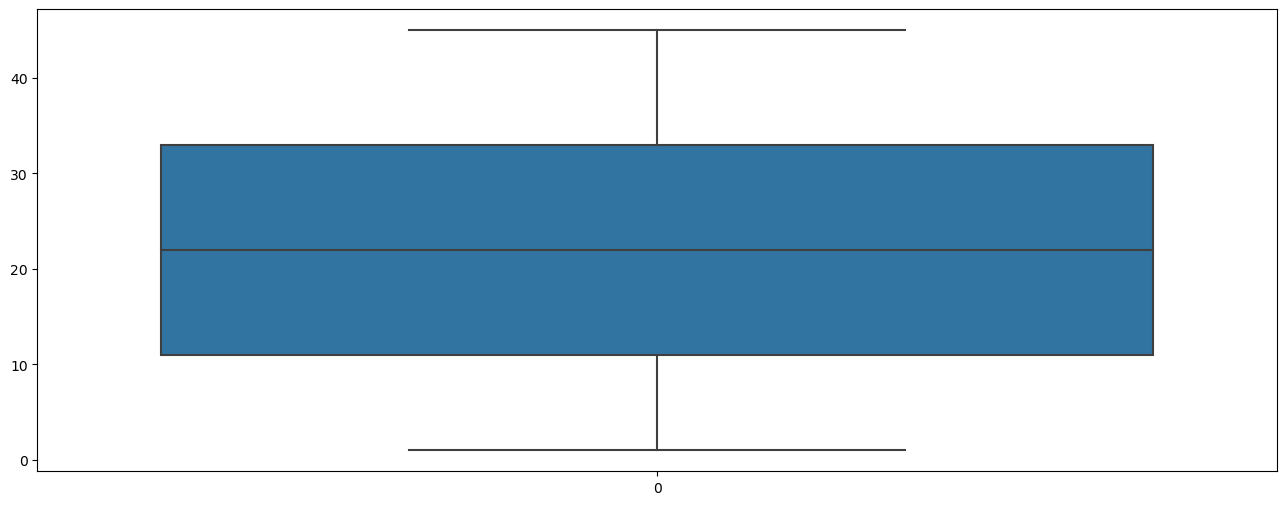

Temperature


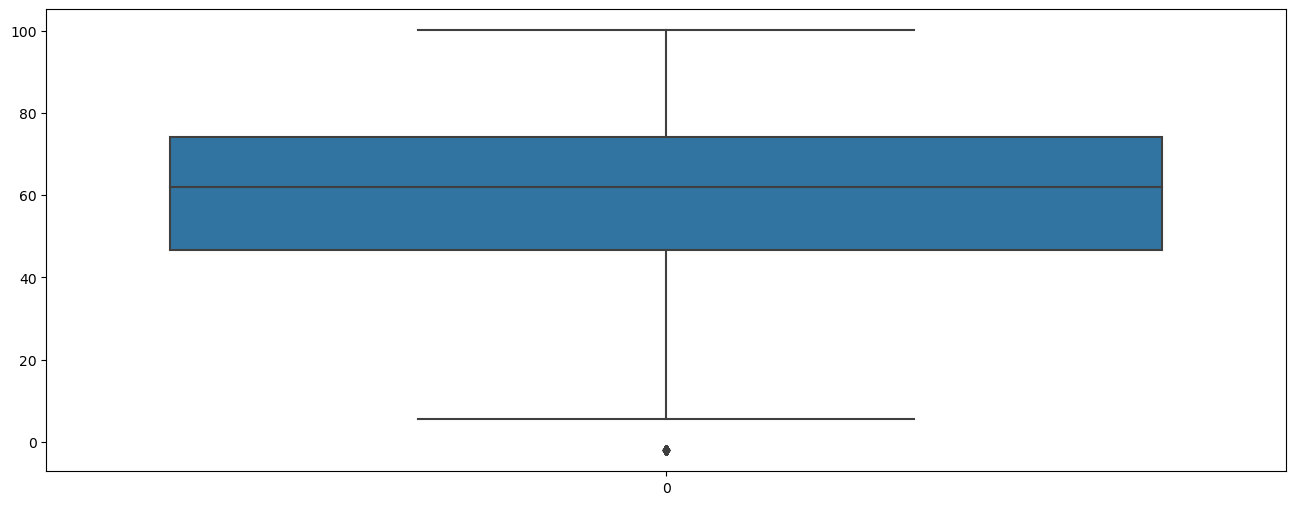

Fuel_Price


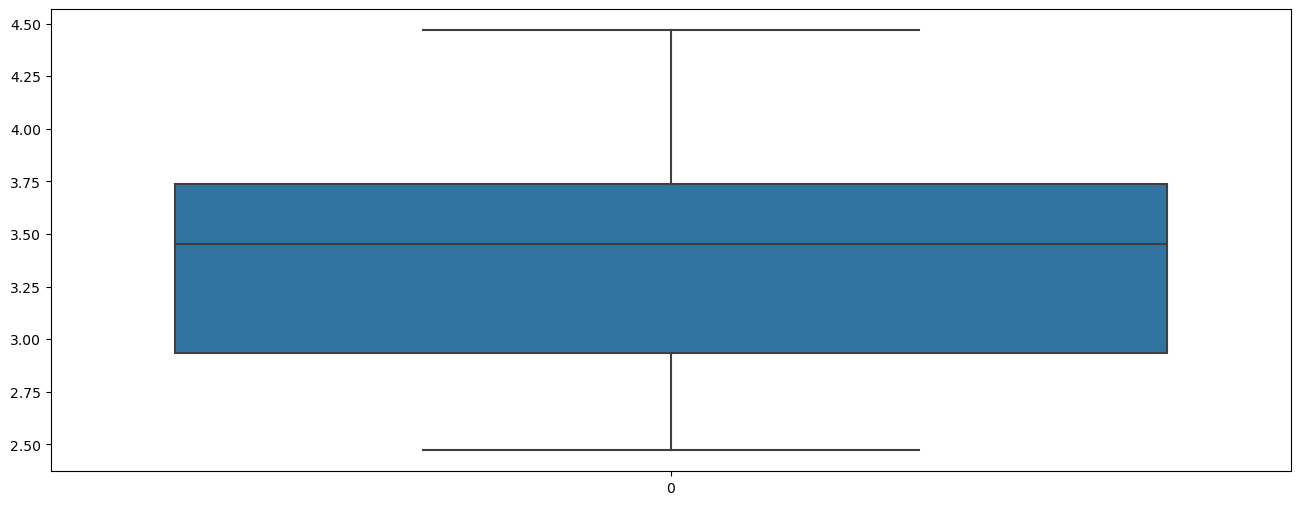

CPI


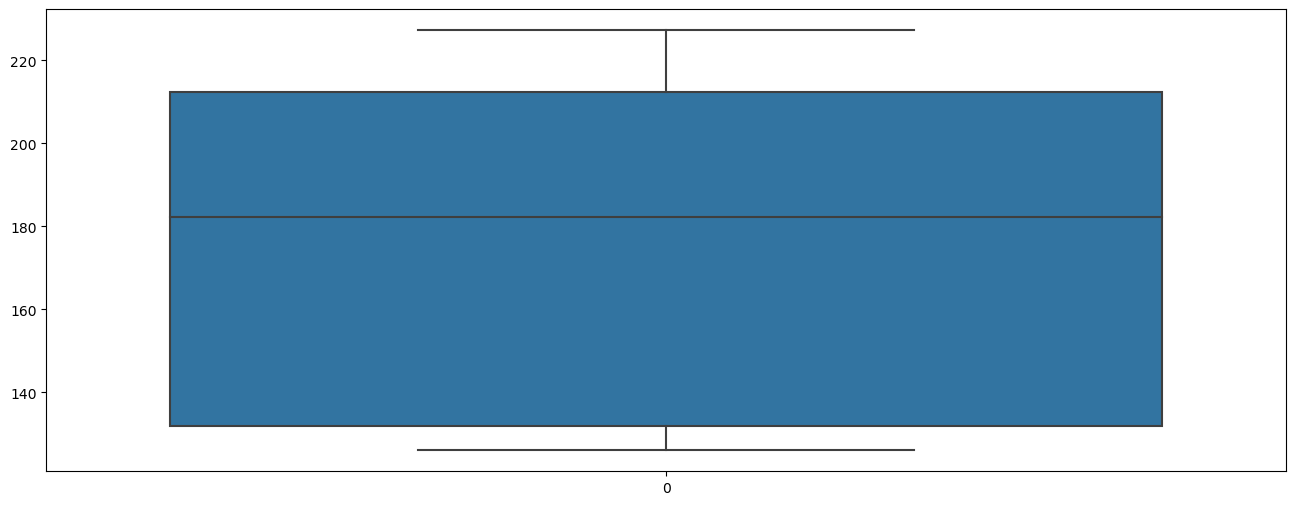

Unemployment


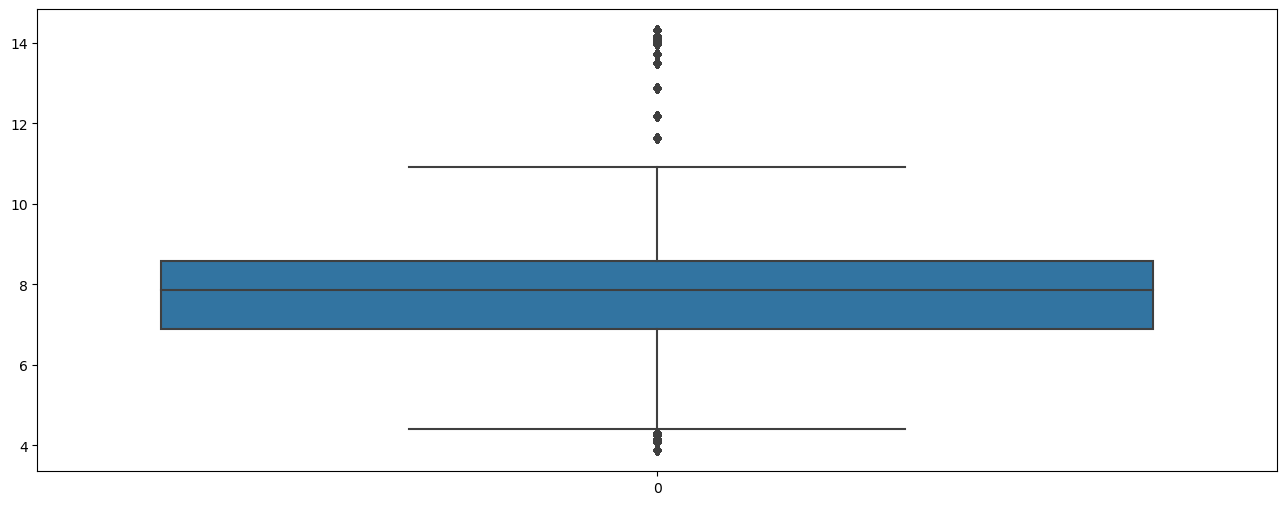

IsHoliday


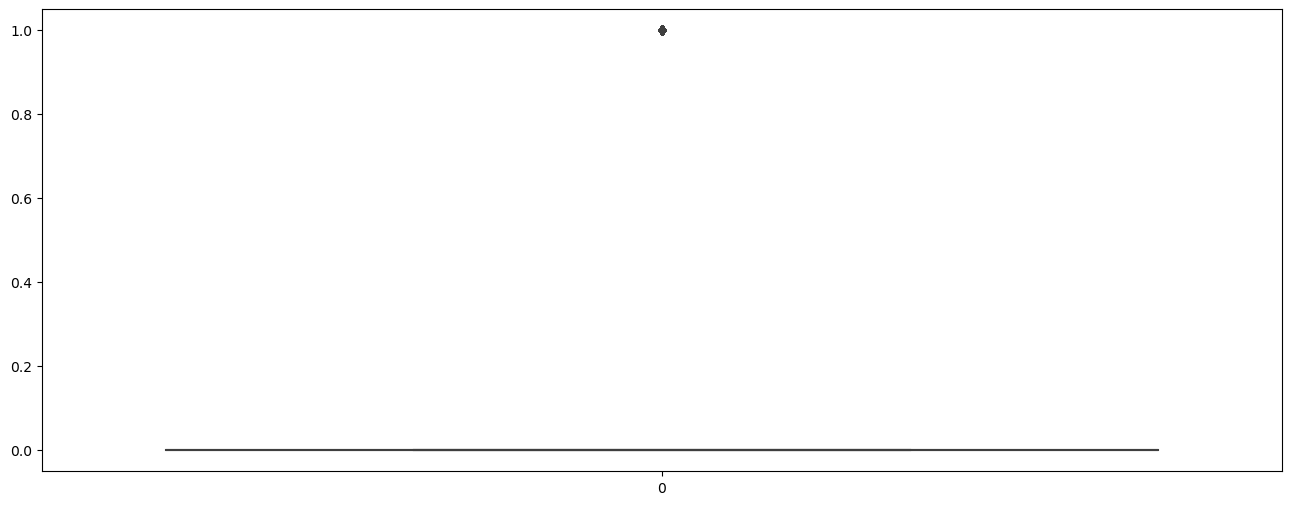

Dept


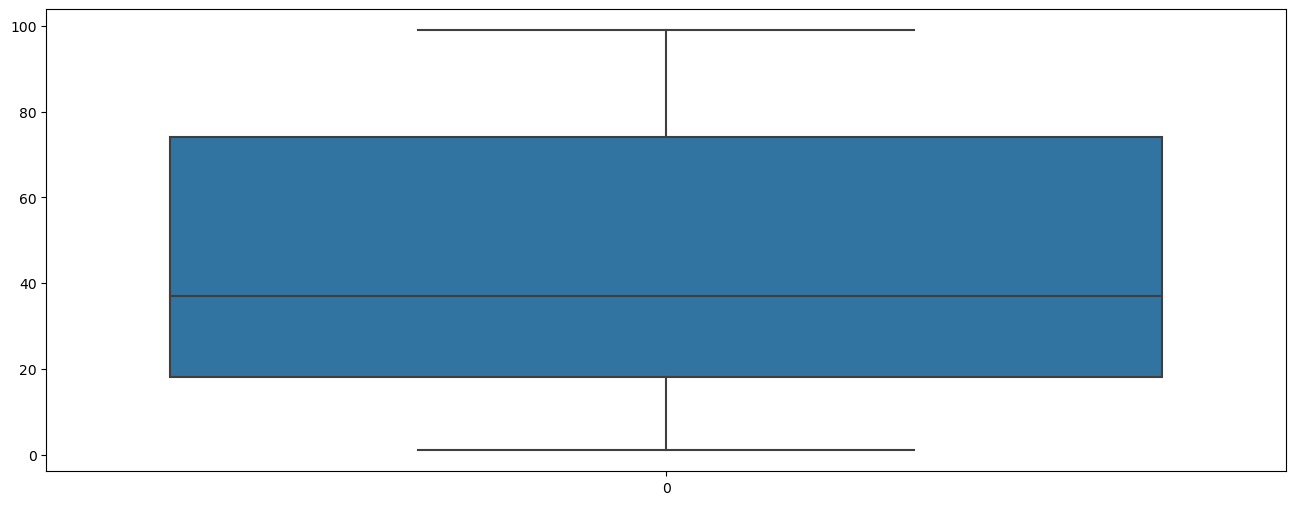

Weekly_Sales


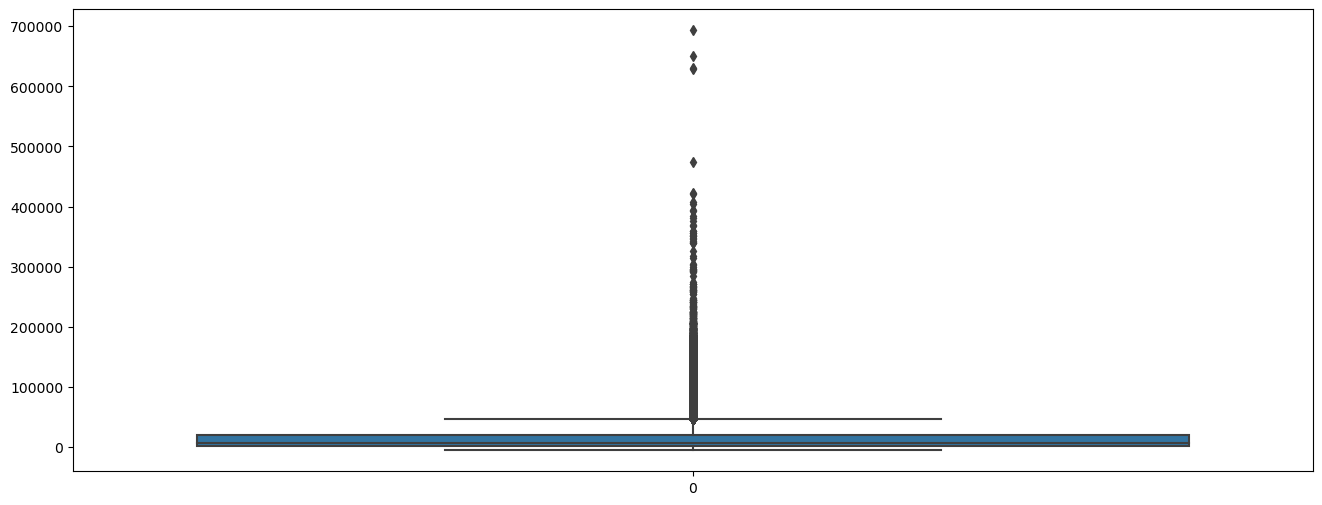

Size


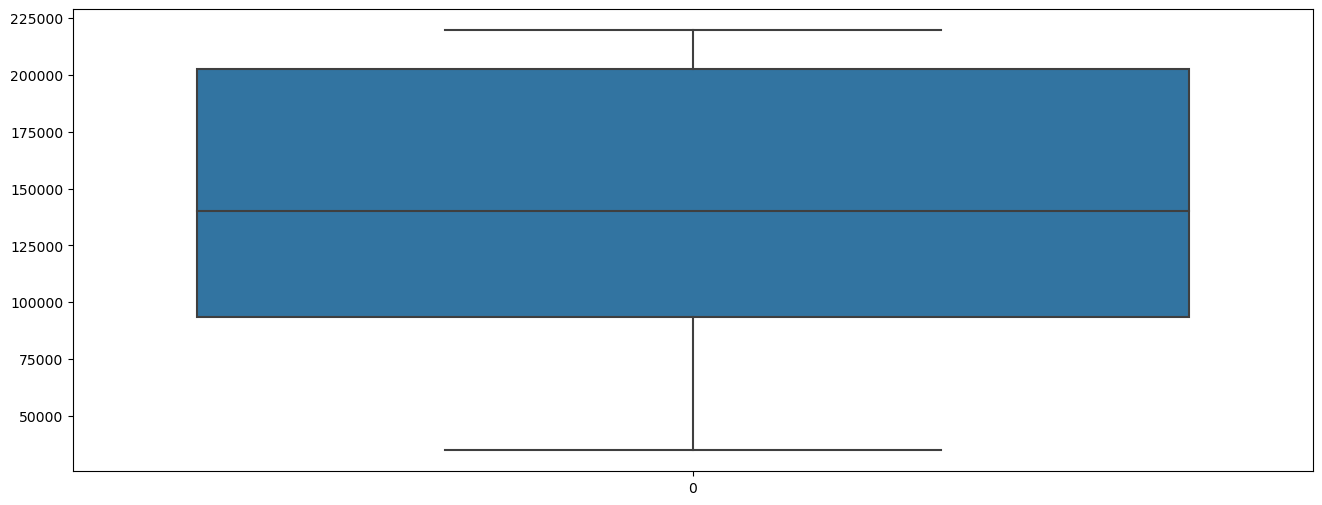

MarkDown


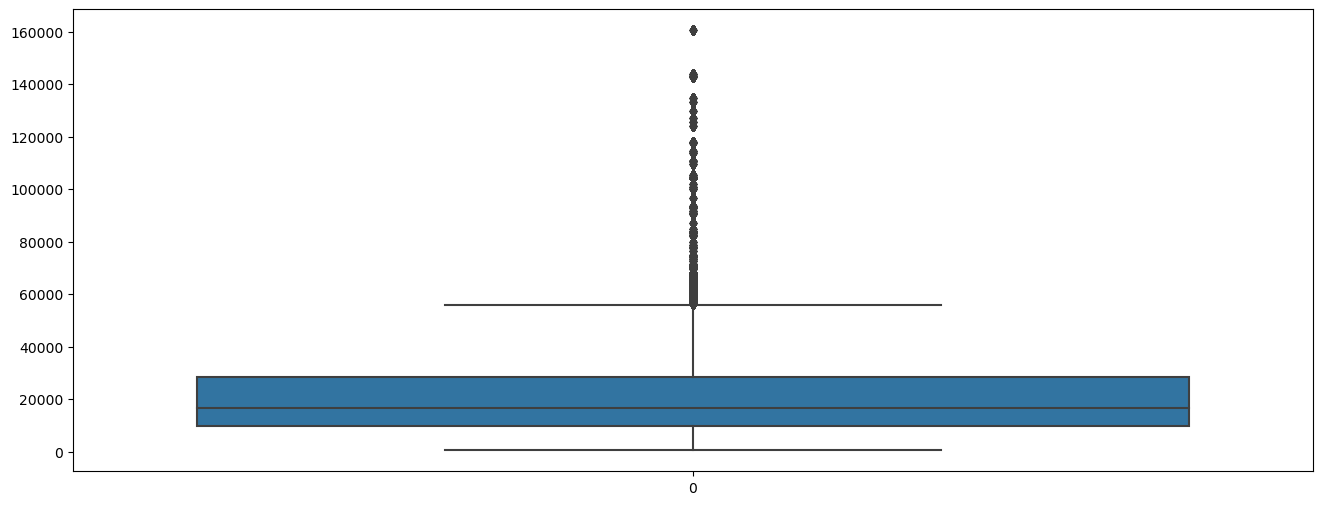

In [102]:
for i in data_2.columns:
    if data_2[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.boxplot(data=data_2[i])
        plt.show()

## single image of data  outlier

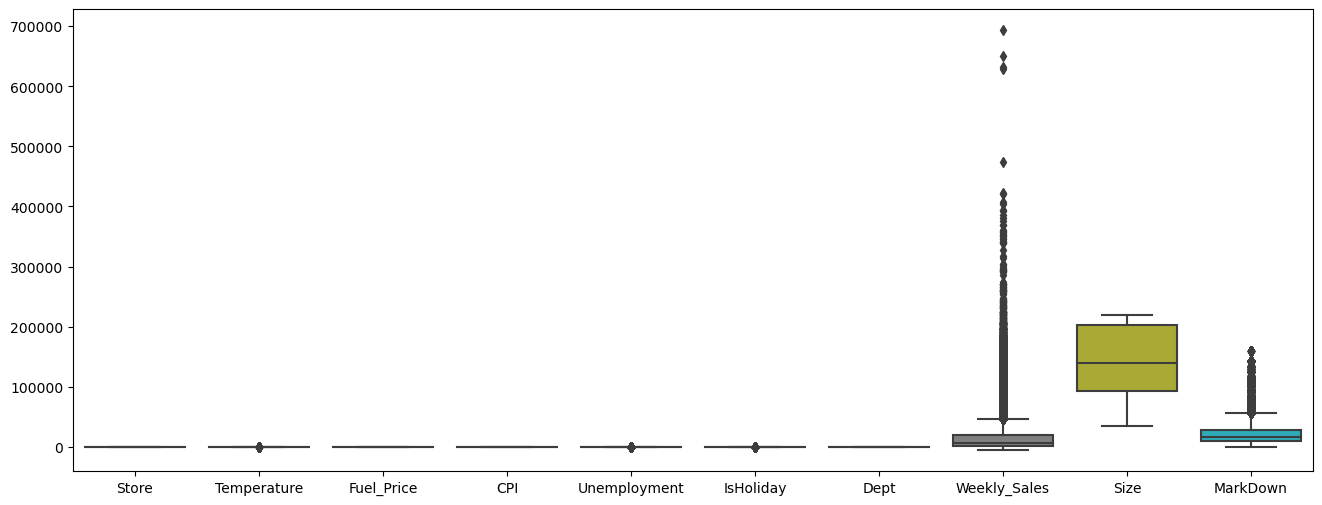

In [103]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_2)
plt.show()

Store


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


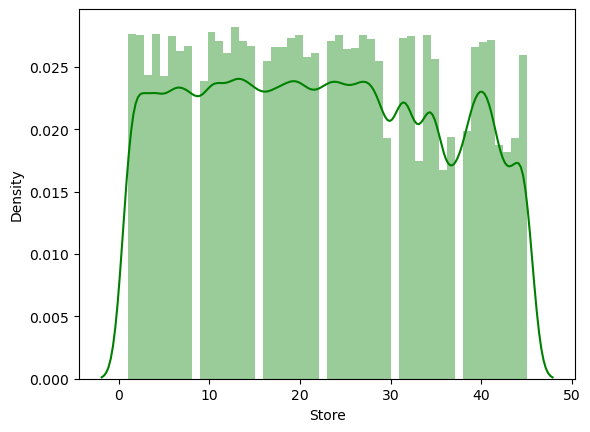

Temperature


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


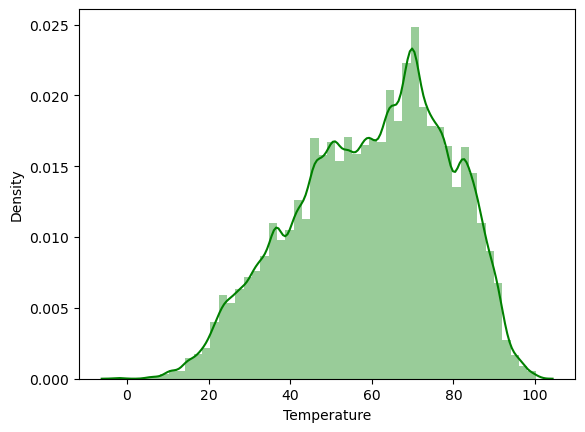

Fuel_Price


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


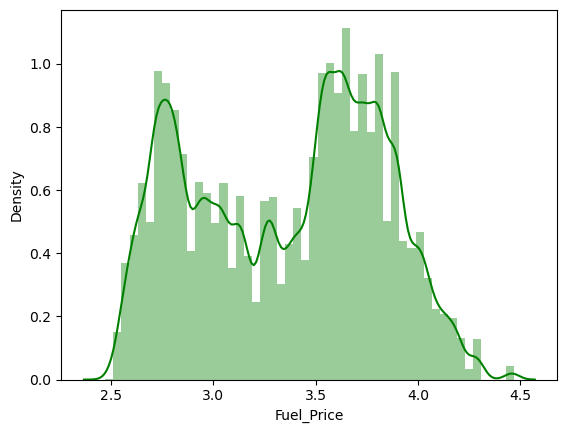

CPI


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


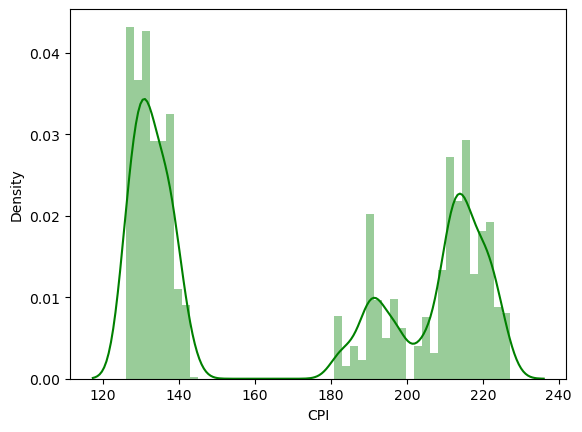

Unemployment


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


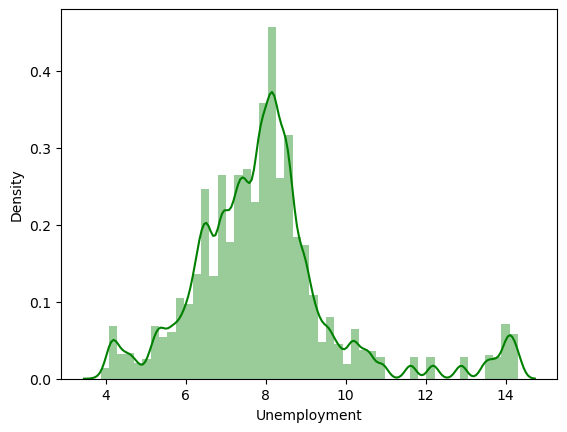

IsHoliday


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


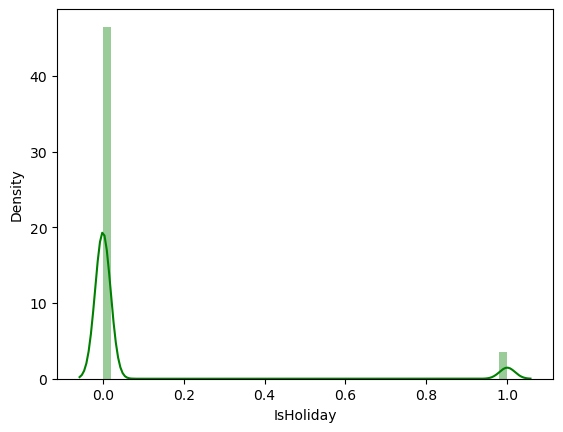

Dept


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


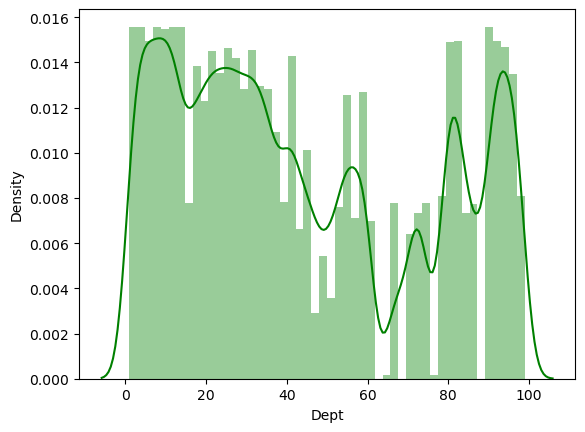

Weekly_Sales


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


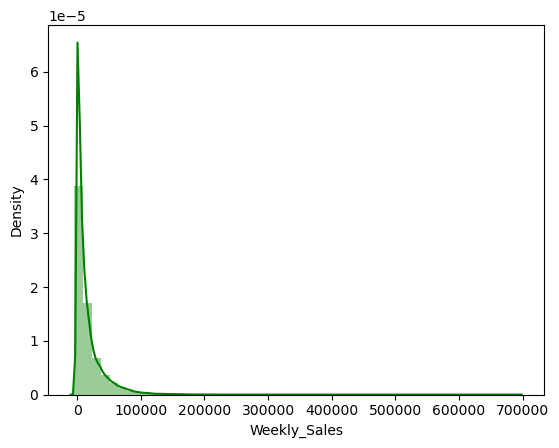

Size


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


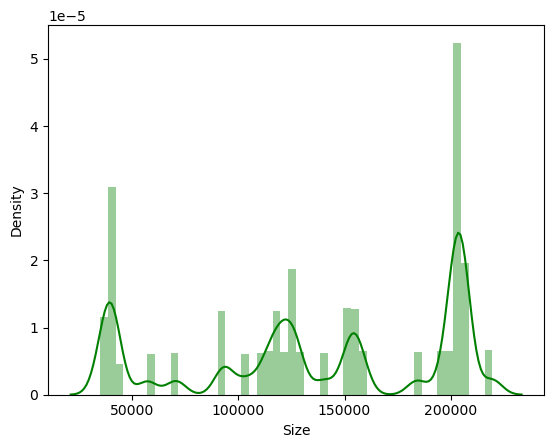

MarkDown


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\3550191943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[i],color="g")


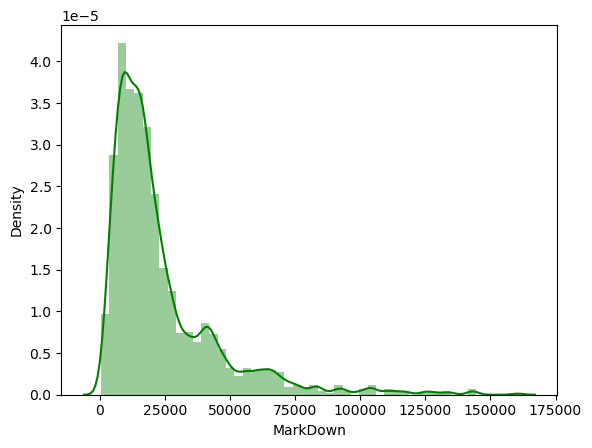

In [104]:
for i in data_2.columns:
    if data_2[i].dtype != "object":
        print(i)
        sns.distplot(data_2[i],color="g")
        plt.show()

# Fill the null values in related to other column s values

In [105]:
# data_2[data_2['Weekly_Sales']==0]

In [106]:
mean=(data_2[(data_2['Store']==1)&(data_2['Type']=="A")&(data_2['IsHoliday']==False)&(data_2['Dept']==47)]['Weekly_Sales'].mean()).round(2)

In [107]:
mean

-116.45

In [108]:
k=data_2[data_2['Weekly_Sales']==0]

# 73 null values vector(row) in weekly sales

In [109]:
k

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown
4132,1,11/03/2011,53.56,3.459,214.111056,7.742,False,47,0.0,A,151315,NaN
5691,1,12/08/2011,90.76,3.638,215.605788,7.962,False,47,0.0,A,151315,NaN
5762,1,19/08/2011,89.94,3.554,215.669311,7.962,False,47,0.0,A,151315,NaN
10732,2,19/03/2010,54.52,2.720,210.873332,8.324,False,60,0.0,A,202307,NaN
18449,2,13/04/2012,68.08,3.891,221.148403,6.891,False,47,0.0,A,202307,21715.91
...,...,...,...,...,...,...,...,...,...,...,...,...
402827,43,13/01/2012,43.68,3.261,211.411571,9.653,False,85,0.0,C,41062,NaN
407180,44,14/01/2011,20.60,2.903,127.300935,7.224,False,27,0.0,C,39910,NaN
414388,45,15/10/2010,58.61,2.868,182.810620,8.724,False,54,0.0,B,118221,NaN
415525,45,11/02/2011,30.30,3.239,183.701613,8.549,True,47,0.0,B,118221,NaN


# Replace related values in related data

In [110]:
for i,j,d,e in zip(k['Store'], k['Type'],k['IsHoliday'],k['Dept']):
    print(i,j,d,e)
    mean=data_2[(data_2['Store']==i)&(data_2['Type']==j)&(data_2['IsHoliday']==d)&(data_2['Dept']==e)]['Weekly_Sales'].mean()
    data_2.loc[(data_2['Store']==i)&(data_2['Type']==j)&(data_2['IsHoliday']==d)&(data_2['Dept']==e), 'Weekly_Sales']= mean

1 A False 47
1 A False 47
1 A False 47
2 A False 60
2 A False 47
3 B False 36
6 A False 78
7 B False 54
7 B False 49
8 A False 78
9 B False 54
10 B False 47
10 B False 78
10 B False 47
10 B False 78
10 B False 47
11 A False 19
12 B False 54
12 B False 47
12 B False 54
13 A False 45
13 A False 78
14 A False 47
14 A False 51
14 A False 78
15 B True 51
15 B False 54
16 B False 47
16 B False 48
17 B False 49
17 B False 41
17 B True 77
18 B False 78
18 B False 47
19 A False 51
19 A False 54
19 A False 78
19 A False 54
19 A False 47
20 A False 19
20 A False 47
20 A False 48
21 B False 98
21 B False 98
22 B False 48
25 B False 54
25 B False 51
25 B False 54
26 A False 60
26 A False 47
27 A False 47
27 A False 47
28 A False 47
30 C False 56
31 A False 18
31 A False 54
32 A False 78
33 A False 25
35 B False 47
35 B False 54
38 C False 44
38 C False 20
39 A False 60
41 A False 78
42 C False 27
42 C False 44
43 C False 32
43 C False 32
43 C False 85
44 C False 27
45 B False 54
45 B True 47
45 B F

In [111]:
data_2[data_2['Weekly_Sales']==0]

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown


# apply in inverse transform in weekly_sales

### I will predict the markdown values using the weekly sales data.

In [125]:
def inverse(x):
    return 1/x

In [126]:
data_4=data_2.copy()
data_4['Weekly_Sales']=data_4['Weekly_Sales'].apply(inverse)

In [123]:
# data_4=data_2.copy()

In [127]:
data_4

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,1,0.000040,A,151315,NaN
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,2,0.000020,A,151315,NaN
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,3,0.000073,A,151315,NaN
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,4,0.000025,A,151315,NaN
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,5,0.000031,A,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,192.308899,8.667,False,93,0.000402,B,118221,5247.26
421566,45,26/10/2012,58.85,3.882,192.308899,8.667,False,94,0.000192,B,118221,5247.26
421567,45,26/10/2012,58.85,3.882,192.308899,8.667,False,95,0.000018,B,118221,5247.26
421568,45,26/10/2012,58.85,3.882,192.308899,8.667,False,97,0.000147,B,118221,5247.26


# See the Markdown values outlier

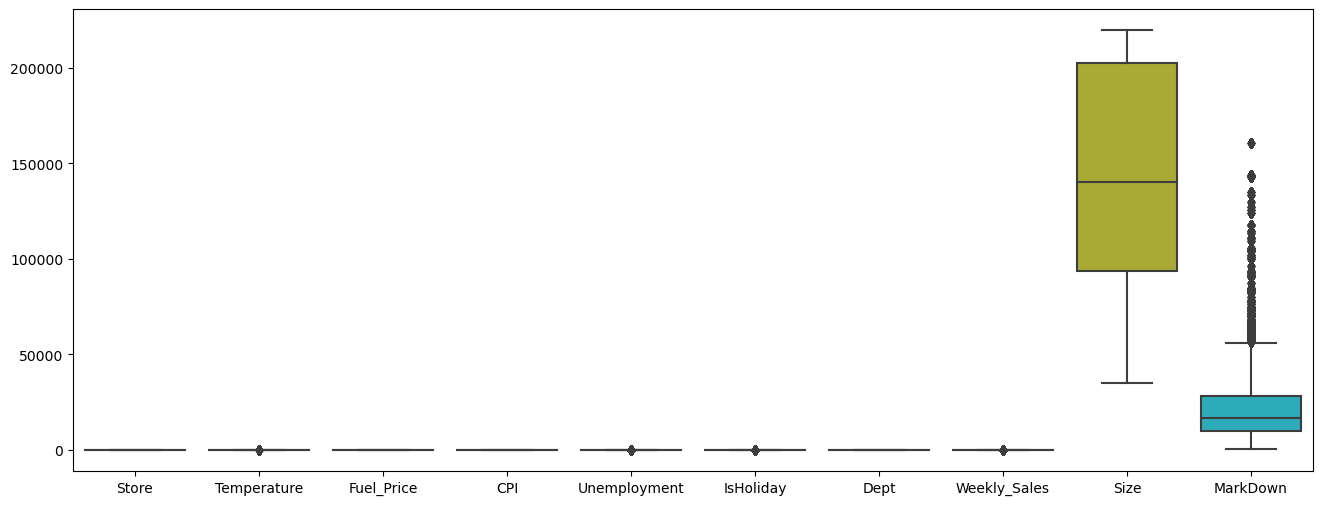

In [128]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_4)
plt.show()

### dont apply inverse transformation

#### see all outliers

In [130]:
data_3=data_2.copy()

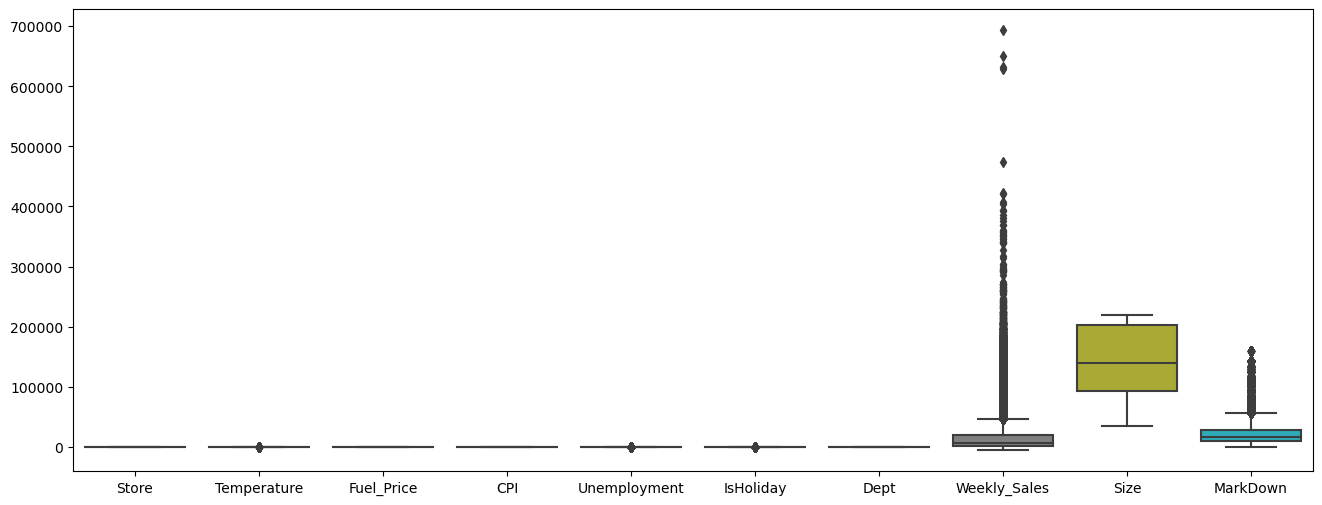

In [131]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_3)
plt.show()

Store


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


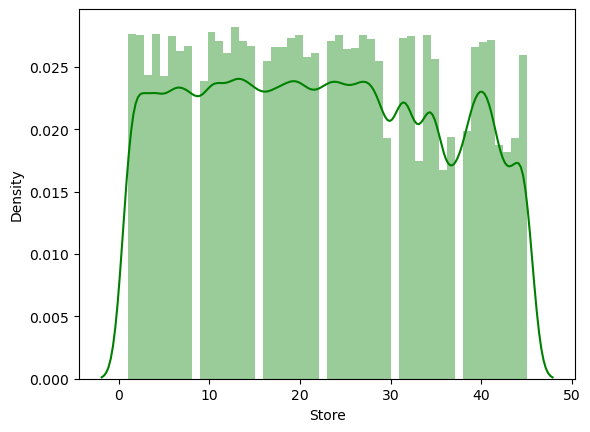

Temperature


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


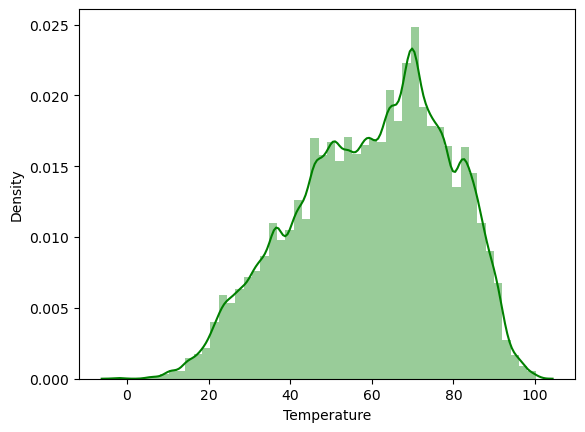

Fuel_Price


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


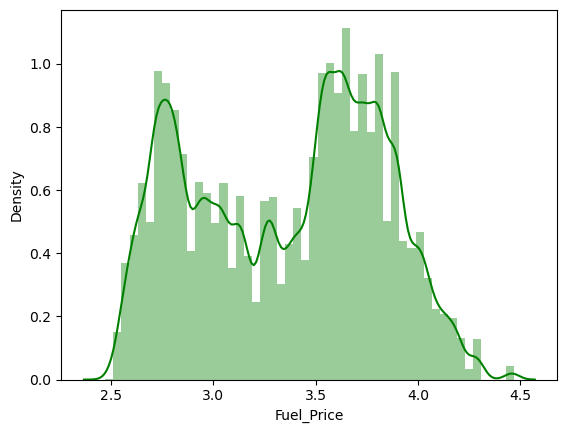

CPI


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


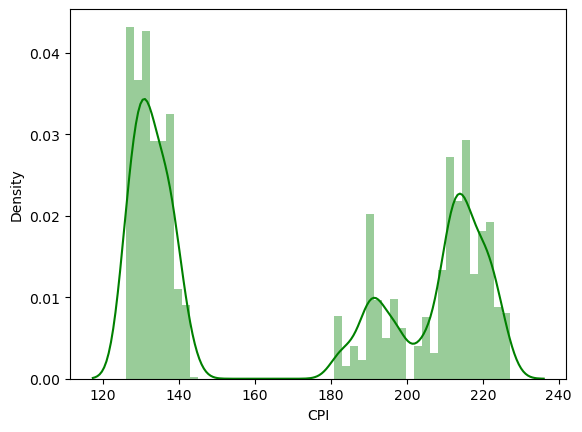

Unemployment


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


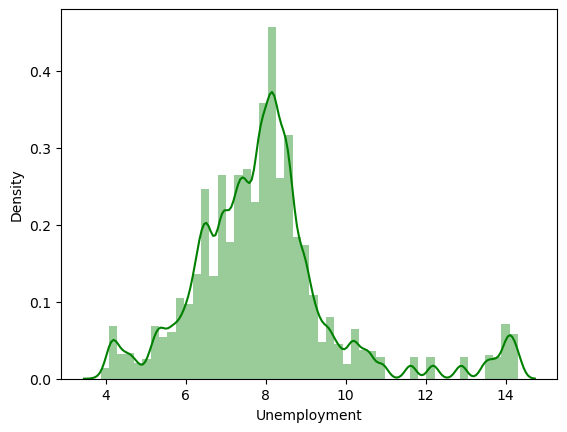

IsHoliday


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


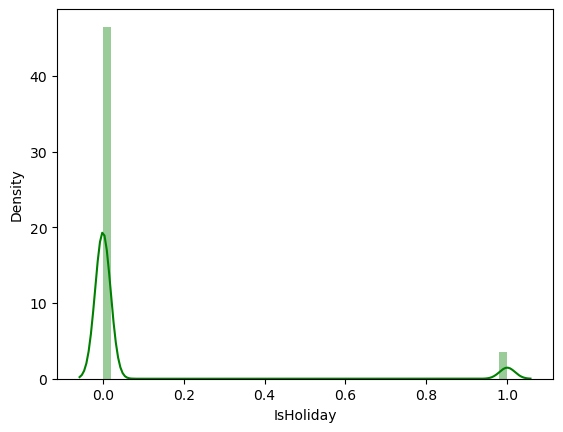

Dept


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


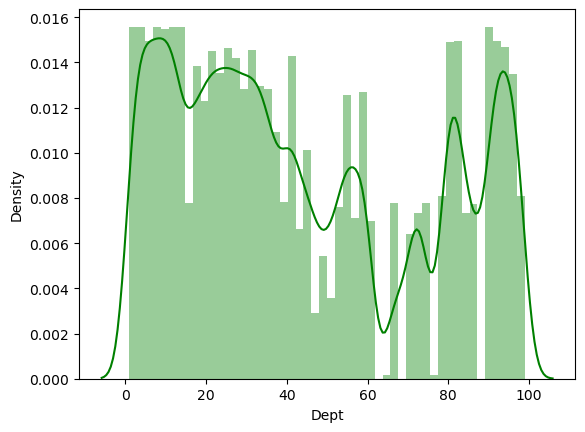

Weekly_Sales


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


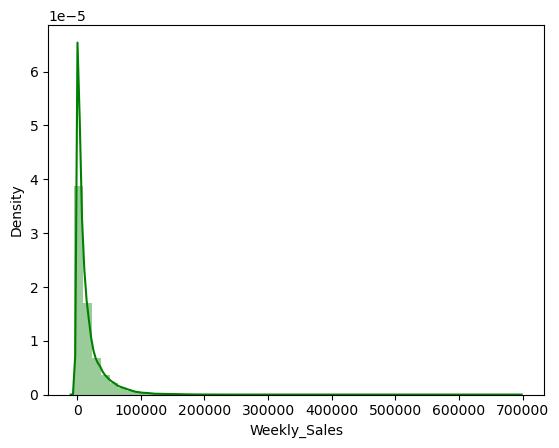

Size


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


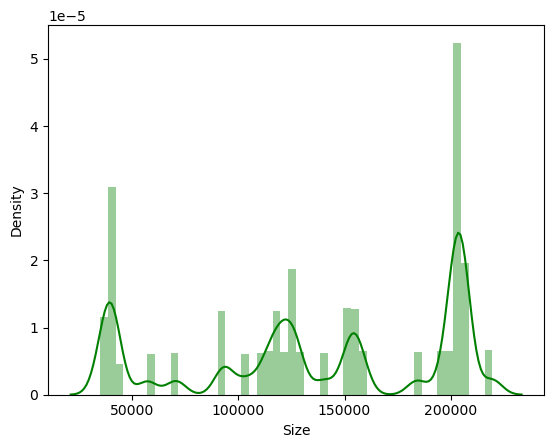

MarkDown


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2424780918.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[i],color="g")


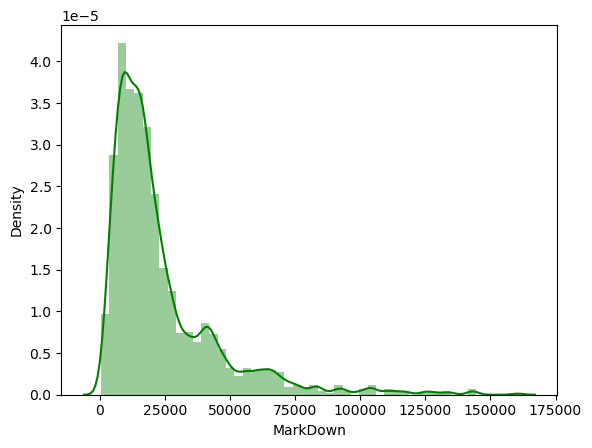

In [132]:
for i in data_3.columns:
    if data_3[i].dtype != "object":
        print(i)
        sns.distplot(data_3[i],color="g")
        plt.show()

In [133]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   CPI           421570 non-null  float64
 5   Unemployment  421570 non-null  float64
 6   IsHoliday     421570 non-null  bool   
 7   Dept          421570 non-null  int64  
 8   Weekly_Sales  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
 11  MarkDown      97056 non-null   float64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 55.1+ MB


In [134]:
data_3['Date']=pd.to_datetime(data_3['Date'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\1375922476.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_3['Date']=pd.to_datetime(data_3['Date'])


In [40]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   CPI           421570 non-null  float64       
 5   Unemployment  421570 non-null  float64       
 6   IsHoliday     421570 non-null  bool          
 7   Dept          421570 non-null  int64         
 8   Weekly_Sales  421570 non-null  float64       
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
 11  MarkDown      151432 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 55.1+ MB


### just try for markdown values predict in ml

#  ordinalEncoding

In [143]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in data_3.columns:
    if data_3[i].dtype == 'object' and data_3[i].dtype =='bool':
#         col_name = i
        data_3[i] = enc.fit_transform(data_3[[i]])
        encoding = data_3[i].sort_values().unique()
        globals()[i] = {}
        decoded_data = enc.inverse_transform(data_3[[i]])
        decoded = sorted(np.unique(decoded_data)) 
        globals()[i] = dict(zip(decoded, encoding))

In [144]:
enc=OrdinalEncoder()
data_3["Type"] = enc.fit_transform(data_3[["Type"]])

In [145]:
data_3.Type.value_counts()

0.0    215478
1.0    163495
2.0     42597
Name: Type, dtype: int64

In [146]:
data_3.IsHoliday.value_counts()

0.0    391909
1.0     29661
Name: IsHoliday, dtype: int64

In [147]:
enc=OrdinalEncoder()
data_3["IsHoliday"] = enc.fit_transform(data_3[["IsHoliday"]])

In [148]:
data_3['IsHoliday'].value_counts()

0.0    391909
1.0     29661
Name: IsHoliday, dtype: int64

# Markdown value prediction


In [149]:
data_3.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown
0,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,1,24924.50,0.0,151315,NaN
1,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,2,50605.27,0.0,151315,NaN
2,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,3,13740.12,0.0,151315,NaN
3,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,4,39954.04,0.0,151315,NaN
4,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,5,32229.38,0.0,151315,NaN


In [150]:
data_3['weekly_sales_weeks']=data_3['Date'].dt.weekofyear
data_3['year']=data_3['Date'].dt.year

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\4018087573.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_3['weekly_sales_weeks']=data_3['Date'].dt.weekofyear


# split nan value in Markdown


In [151]:
null_values=data_3[data_3['MarkDown'].isnull()]

In [152]:
not_null_values=data_3[data_3['MarkDown'].isnull()== False]

In [153]:
not_null_values

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown,weekly_sales_weeks,year
6587,1,2011-11-11,59.11,3.297,217.998085,7.866,0.0,1,18689.54,0.0,151315,25671.68,45,2011
6588,1,2011-11-11,59.11,3.297,217.998085,7.866,0.0,2,44936.47,0.0,151315,25671.68,45,2011
6589,1,2011-11-11,59.11,3.297,217.998085,7.866,0.0,3,9959.64,0.0,151315,25671.68,45,2011
6590,1,2011-11-11,59.11,3.297,217.998085,7.866,0.0,4,36826.52,0.0,151315,25671.68,45,2011
6591,1,2011-11-11,59.11,3.297,217.998085,7.866,0.0,5,31002.65,0.0,151315,25671.68,45,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,192.308899,8.667,0.0,93,2487.80,1.0,118221,5247.26,43,2012
421566,45,2012-10-26,58.85,3.882,192.308899,8.667,0.0,94,5203.31,1.0,118221,5247.26,43,2012
421567,45,2012-10-26,58.85,3.882,192.308899,8.667,0.0,95,56017.47,1.0,118221,5247.26,43,2012
421568,45,2012-10-26,58.85,3.882,192.308899,8.667,0.0,97,6817.48,1.0,118221,5247.26,43,2012


In [154]:

x=not_null_values.drop(columns=['Date','MarkDown','Size'],axis=1)
y=not_null_values['MarkDown']

In [155]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

## fill the null values in markdown

In [156]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=90,random_state=15,max_depth=22,min_samples_split=25)
model.fit(x,y)

RandomForestRegressor(max_depth=22, min_samples_split=25, n_estimators=90,
                      random_state=15)

In [157]:
# from sklearn.neighbors import KNeighborsRegressor
# model= KNeighborsRegressor(n_neighbors=2)
# model.fit(x,y)

In [158]:
y_pred=model.predict(x)

In [159]:
y_pred

array([25671.68, 25671.68, 25671.68, ...,  5247.26,  5247.26,  5247.26])

In [160]:
mean_absolute_error(y_pred,y)

20.428043040415762

# null value prediction

In [161]:
x1=null_values.drop(columns=['Date','MarkDown','Size'],axis=1)

In [162]:
null_predict=model.predict(x1)


In [163]:
null_predict

array([45502.34122222, 45502.34122222, 45502.34122222, ...,
        6096.19244444,  6096.19244444,  6096.19244444])

# insert null value in data set

In [164]:
null_values['MarkDown']= null_predict

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\2140423591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_values['MarkDown']= null_predict


In [165]:
null_values

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown,weekly_sales_weeks,year
0,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,1,24924.50,0.0,151315,45502.341222,17,2010
1,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,2,50605.27,0.0,151315,45502.341222,17,2010
2,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,3,13740.12,0.0,151315,45502.341222,17,2010
3,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,4,39954.04,0.0,151315,45502.341222,17,2010
4,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,5,32229.38,0.0,151315,45502.341222,17,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421498,45,2012-10-19,56.47,3.969,192.330854,8.667,0.0,93,2270.50,1.0,118221,6096.192444,42,2012
421499,45,2012-10-19,56.47,3.969,192.330854,8.667,0.0,94,4655.65,1.0,118221,6096.192444,42,2012
421500,45,2012-10-19,56.47,3.969,192.330854,8.667,0.0,95,48434.97,1.0,118221,6096.192444,42,2012
421501,45,2012-10-19,56.47,3.969,192.330854,8.667,0.0,97,5575.90,1.0,118221,6096.192444,42,2012


# merge null value data set and not null value data set 

In [166]:
clean_data=pd.concat([null_values,not_null_values],ignore_index=True)
clean_data.shape

(421570, 14)

In [167]:
151432+270138

421570

In [168]:
clean_data

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown,weekly_sales_weeks,year
0,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,1,24924.50,0.0,151315,45502.341222,17,2010
1,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,2,50605.27,0.0,151315,45502.341222,17,2010
2,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,3,13740.12,0.0,151315,45502.341222,17,2010
3,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,4,39954.04,0.0,151315,45502.341222,17,2010
4,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,5,32229.38,0.0,151315,45502.341222,17,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,192.308899,8.667,0.0,93,2487.80,1.0,118221,5247.260000,43,2012
421566,45,2012-10-26,58.85,3.882,192.308899,8.667,0.0,94,5203.31,1.0,118221,5247.260000,43,2012
421567,45,2012-10-26,58.85,3.882,192.308899,8.667,0.0,95,56017.47,1.0,118221,5247.260000,43,2012
421568,45,2012-10-26,58.85,3.882,192.308899,8.667,0.0,97,6817.48,1.0,118221,5247.260000,43,2012


In [169]:
# pd.set_option('display.max_rows', None)

In [170]:
clean_data.head(50000)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown,weekly_sales_weeks,year
0,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,1,24924.50,0.0,151315,45502.341222,17,2010
1,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,2,50605.27,0.0,151315,45502.341222,17,2010
2,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,3,13740.12,0.0,151315,45502.341222,17,2010
3,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,4,39954.04,0.0,151315,45502.341222,17,2010
4,1,2010-05-02,42.31,2.572,211.096358,8.106,0.0,5,32229.38,0.0,151315,45502.341222,17,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7,2012-06-04,44.29,3.854,197.597128,8.090,0.0,98,376.88,1.0,70713,8282.712000,23,2012
49996,7,2012-04-27,51.49,3.927,197.664546,8.090,0.0,1,6540.72,1.0,70713,8418.038000,17,2012
49997,7,2012-04-27,51.49,3.927,197.664546,8.090,0.0,2,19383.49,1.0,70713,8418.038000,17,2012
49998,7,2012-04-27,51.49,3.927,197.664546,8.090,0.0,3,6352.72,1.0,70713,8418.038000,17,2012


In [171]:
clean_data.to_csv('clean_dataset.csv',index=False)

In [172]:
data_2.head(500)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,MarkDown
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,1,24924.50,A,151315,NaN
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,2,50605.27,A,151315,NaN
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,3,13740.12,A,151315,NaN
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,4,39954.04,A,151315,NaN
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,5,32229.38,A,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,19/03/2010,54.58,2.720,211.215635,8.106,False,81,30287.91,A,151315,NaN
496,1,19/03/2010,54.58,2.720,211.215635,8.106,False,82,18348.98,A,151315,NaN
497,1,19/03/2010,54.58,2.720,211.215635,8.106,False,83,6226.01,A,151315,NaN
498,1,19/03/2010,54.58,2.720,211.215635,8.106,False,85,4072.67,A,151315,NaN


In [173]:
data_2.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
MarkDown        324514
dtype: int64

In [174]:
data_2_null_value=data_2[data_2['MarkDown'].isnull()]

In [175]:
data_2_not_null_value=data_2[data_2['MarkDown'].isnull()==False]

In [176]:
data_2_null_value['MarkDown']= null_predict

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10136\1353573537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_null_value['MarkDown']= null_predict


In [177]:
clean_analysis_data=pd.concat([data_2_not_null_value,data_2_null_value],ignore_index=True)
clean_analysis_data.shape

(421570, 12)

In [178]:
clean_analysis_data.to_csv('clean_analysis_data.csv',index=False)

## open testing file